# Rare values

## Labels that occur rarely

Categorical variables are those which values are selected from a group of categories, also called labels. It is not unusual that different labels appear in  the dataset with different frequencies. Some categories may appear a lot in the dataset, whereas some other categories appear only in a few number of observations.

Consider for example a dataset with information about loan applicants for the Lending Club data exercise where one of the variables is "city where the applicant lives". We can imagine that cities like 'New York' may appear a lot in the data set just because New York has a huge population. On the other hand, smaller towns like 'Leavenworth' will appear only on a few occasions (if at all, population < 2000 people), just because the population there is very small.

Categorical variables in business datasets very often contain a few dominant labels that account for the majority of the observations and a large number of labels that appear only seldomly. 

### Are Rare Labels in a categorical variable a problem?

Rare values can add a lot of information at the time of making an assessment or none at all. For example, consider a stockholder meeting where each person can vote in proportion to their number of shares. One of the shareholders owns 50% of the stock, and the other 999 shareholders own the remaining 50%. The outcome of the vote is largely influenced by the shareholder who holds the majority of the stock. The remaining shareholders may have an impact collectively, but they have virtually no impact individually. 

The same occurs in real life datasets. The label that is over-represented in the dataset tends to dominate the outcome, and those that are under-represented may have no impact individually, but could have an impact if considered collectively.

More specifically,

- Rare values in categorical variables tend to cause over-fitting, particularly in tree based methods.

- A big number of infrequent labels adds noise, with little information, therefore causing over-fitting.

- Rare labels may be present in training set, but not in test set, therefore causing over-fitting to the train set.

- Rare labels may appear in the test set, and not in the train set. Thus, the machine learning model will not know how to evaluate it. 


**Note** Sometimes rare values, like outliers, are worth having a look at, in particular, when we are looking for rare instances (e.g., when the target is highly unbalanced). For example, if we are building a model to predict fraudulent applications, which are in essence rare, then a rare value in a certain variable, may be indeed important. This rare value could be telling us that the observation is most likely a fraudulent application, and therefore we would choose not to ignore it.

I will show you how to tackle rare labels later in the course. Here I would like to give you an idea of how rare labels may affect the performance of machine learning algorithms. So, let's go ahead and see the effect of Rare Values in Categorical variables on Machine Learning models.

## Real Life example: 

### The Mercedes-Benz Greener Manufacturing challenge in Kaggle

Daimler’s Mercedes-Benz cars are leaders in the premium car industry. With a huge selection of car features and options, customers can choose the customized Mercedes-Benz of their dreams.

To ensure the safety and reliability of each and every unique car configuration before they hit the road, Daimler’s engineers have developed a robust testing system. Testing time varies depending on the different car features and options. The task is to predict the time it takes for a car with certain features to pass the testing. Therefore it is a regression problem: we need to estimate a continuous variable.

The dataset contains a set of car features, the variable names are masked, so it is impossible to find out what each one of them means. The variable to predict is _y_: time to pass the testing.

====================================================================================================

To download the Mercedes-Benz Greener Manufacturing dataset from Kaggle go ahead to this [website](https://www.kaggle.com/c/mercedes-benz-greener-manufacturing/data)

Scroll down to the bottom of the page, and click on the link 'train.csv.zip', and then click the 'download' blue button towards the right of the screen, to download the dataset.
Unzip it, and save it to a directory of your choice.

**Note that you need to be logged in to Kaggle in order to download the datasets**.

If you save it in the same directory from which you are running this notebook and name the file 'mercedesbenz.csv' then you can load it the same way I will load it below.

====================================================================================================

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [2]:
# let's load the dataset with just the columns that we need for this exercise

data = pd.read_csv('mercedesbenz.csv', usecols=['y','X1', 'X2', 'X3', 'X6'])
data.head()

,y,X1,X2,X3,X6
0,130.81,v,at,a,j
1,88.53,t,av,e,l
2,76.26,w,n,c,j
3,80.62,t,n,f,l
4,78.02,v,n,f,d


Variable names and variable values are masked intentionally by Mercedes Benz. This is common practice in the industry, and it is done to protect intellectual property and personal information, if any.

In [3]:
# let's check at the different number of labels within each variable
cols_to_use = ['X1', 'X2', 'X3', 'X6']

for col in cols_to_use:
    print('variable: ', col, ' number of labels: ', len(data[col].unique()))
    
print('total cars: ', len(data))

variable:  X1  number of labels:  27
variable:  X2  number of labels:  44
variable:  X3  number of labels:  7
variable:  X6  number of labels:  12
total cars:  4209


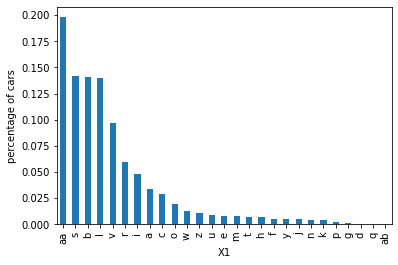

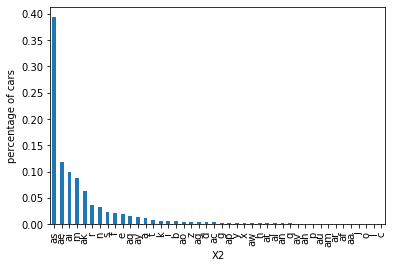

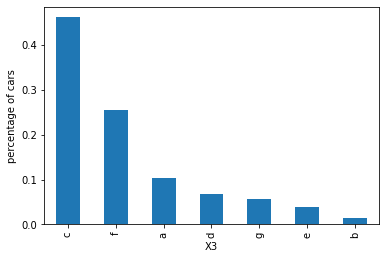

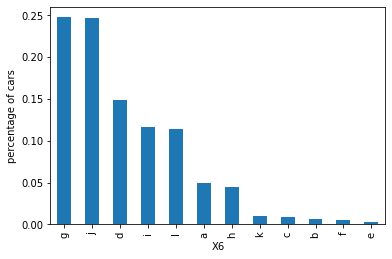

In [4]:
# let's plot how frequently appears each label 
# within a variable in the dataset

total_cars = len(data)

for col in cols_to_use:
    # count the number of observations per label and divide by total 
    # number of cars
    temp_df = pd.Series(data[col].value_counts() / total_cars)
    
    # make plot with the above percentages
    fig = temp_df.sort_values(ascending=False).plot.bar()
    fig.set_xlabel(col)
    fig.set_ylabel('percentage of cars')
    plt.show()

We can see that for each of the above variables, some labels appear in more than 10% of the cars in the dataset, and very many appear in less than 10% or even 5% of the cars. These are infrequent labels or **Rare Values** and could cause over-fitting.

### How is the target, "time to pass testing", related to these categories?

In [5]:
# I will work first the the variable X3

# Let's calculate again the frequency of the different categories/labels
# in X3

temp_df = pd.Series(data['X3'].value_counts() / total_cars).reset_index()
temp_df.columns = ['X3', 'X3_perc_cars']
temp_df

,X3,X3_perc_cars
0,c,0.461392
1,f,0.255643
2,a,0.104538
3,d,0.068900
4,g,0.057258
5,e,0.038727
6,b,0.013542


In [6]:
# now let's calculate the mean "time to pass testing"
# for each label in X3

data.groupby(['X3'])['y'].mean().reset_index()

,X3,y
0,a,102.507477
1,b,100.239649
2,c,101.959269
3,d,105.114414
4,e,100.033190
5,f,96.564507
6,g,100.428672


In [7]:
# Let's combine the 2 previous dataframes
# I will merge the second dataframe with the mean
# time to pass testing onto the first one with the
# frequency of labels (which I called temp_df)

temp_df = temp_df.merge(
    data.groupby(['X3'])['y'].mean().reset_index(), on='X3', how='left')

temp_df

,X3,X3_perc_cars,y
0,c,0.461392,101.959269
1,f,0.255643,96.564507
2,a,0.104538,102.507477
3,d,0.068900,105.114414
4,g,0.057258,100.428672
5,e,0.038727,100.033190
6,b,0.013542,100.239649


Text(0, 0.5, 'Seconds')

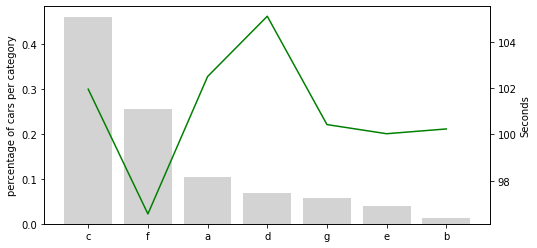

In [8]:
# Let's make a combined plot of the label frequency and
# the time to pass testing.
# This will help us  visualise the relationship between the
# target and the labels of X3

fig, ax = plt.subplots(figsize=(8, 4))
plt.xticks(temp_df.index, temp_df['X3'], rotation=0)

ax2 = ax.twinx()
ax.bar(temp_df.index, temp_df["X3_perc_cars"], color='lightgrey')
ax2.plot(temp_df.index, temp_df["y"], color='green', label='Seconds')
ax.set_ylabel('percentage of cars per category')
ax2.set_ylabel('Seconds')

Cars where X3 is f pass the test relatively quickly, whereas cars with the category d seem to take a longer time to pass the test.

Cars where X3 is b, take around 100 seconds to pass the test. However, b is present in less than 10% of the cars. Why is this important? Well, because if we do not have a lot of cars to learn from, we could be under or over-estimating the effect if b on the time to pass a test.

In the next cell, I will combine all the above lines of code in a loop, and repeat the exercise for the remaining variables.

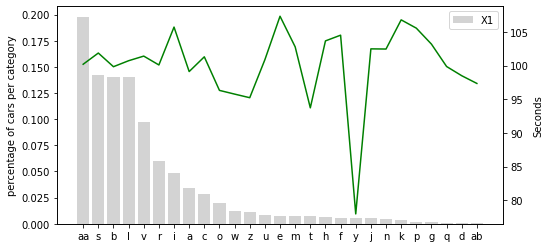

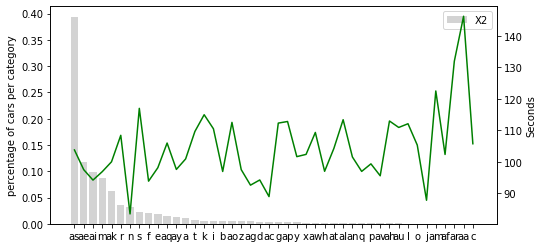

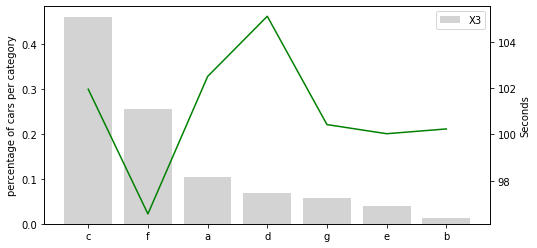

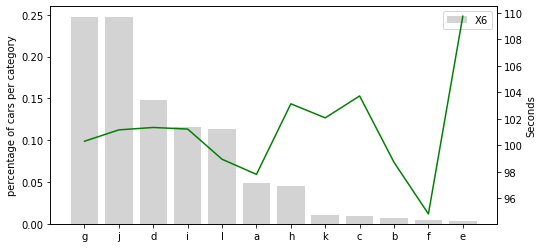

In [9]:
# let's automate the above process for all the categorical variables

for col in cols_to_use:
    # calculate the frequency of the different labels in the variable
    temp_df = pd.Series(data[col].value_counts() / total_cars).reset_index()

    # rename the columns
    temp_df.columns = [col, col + '_perc_cars']

    # merge onto the mean time to pass the test
    temp_df = temp_df.merge(
        data.groupby([col])['y'].mean().reset_index(), on=col, how='left')

    # plot the figure as shown above
    fig, ax = plt.subplots(figsize=(8, 4))
    plt.xticks(temp_df.index, temp_df[col], rotation=0)
    ax2 = ax.twinx()

    ax.bar(
        temp_df.index,
        temp_df[col + '_perc_cars'],
        color='lightgrey',
        label=col)

    ax2.plot(
        temp_df.index,
        temp_df["y"],
        color='green',
    )

    ax.set_ylabel('percentage of cars per category')
    ax2.set_ylabel('Seconds')
    ax.legend()
    plt.show()

Different labels within each variable seem to have a different influence in the time to pass the test. Take your time to explore the graphs and draw some conclusions.

Look then in particular at the variable X2: in the plot, the target "y" varies a lot among the rare categories. It goes up and down over the infrequent categories. In fact, it looks quite noisy. This rare labels could indeed be very predictive, or they could be introducing noise rather than information. And because the labels are under-represented among the cars, we are unsure whether they have a true impact on the time to pass. We could be under or over-estimating their impact due to the fact that we have information for few cars.

This plot would bring more value, if we plotted the errors of the mean time to pass the test. This would give us an idea of how much the mean value of the target varies within each label. Why don't you go ahead and do so? Plot first the distribution of the target y. If it is somewhat normal, then the error will be the standard deviation. Otherwise you can plot the interquantile range.

### Remove rare labels: grouping under a new label

One way of tackling rare or infrequent values, is to group them under an umbrella category called 'Rare' or 'Other'. I will say more on this in a dedicated section of the course. Now I will group infrequent labels in each of the variables into one category called 'Rare' because I want to show you how this affects the performance of machine learning algorithms.

In [10]:
# grouping rare labels into one category

# I will replace all the labels that appear in less than 10%
# of the observations by the new label 'rare'

# first I calculate the frequency of the categories
# or in other words, the % of cars in each category for  
# the variable X1

temp_df = pd.Series(data['X1'].value_counts() / total_cars)
temp_df.sort_values(ascending=False)
temp_df

aa    0.197909
s     0.142077
b     0.140651
l     0.140176
v     0.096935
r     0.059634
i     0.048230
a     0.033975
c     0.028748
o     0.019482
w     0.012354
z     0.010929
u     0.008791
e     0.007840
m     0.007603
t     0.007365
h     0.006890
f     0.005464
y     0.005464
j     0.005227
n     0.004514
k     0.004039
p     0.002138
g     0.001426
q     0.000713
d     0.000713
ab    0.000713
Name: X1, dtype: float64

In [11]:
# visualise those labels that appear in
# more than 10 % of the cars
temp_df[temp_df >= 0.1].index

Index(['aa', 's', 'b', 'l'], dtype='object')

Only 4 categories are relatively common across the different cars. The remaining appear only in a few cars. Therefore, how they affect the time to pass the test is difficult to know with certainty.

In [12]:
# let's create a dictionary to replace the rare labels with the
# string 'rare'

grouping_dict = {
    k: ('rare' if k not in temp_df[temp_df >= 0.1].index else k)
    for k in temp_df.index
}

grouping_dict

{'aa': 'aa',
 's': 's',
 'b': 'b',
 'l': 'l',
 'v': 'rare',
 'r': 'rare',
 'i': 'rare',
 'a': 'rare',
 'c': 'rare',
 'o': 'rare',
 'w': 'rare',
 'z': 'rare',
 'u': 'rare',
 'e': 'rare',
 'm': 'rare',
 't': 'rare',
 'h': 'rare',
 'f': 'rare',
 'y': 'rare',
 'j': 'rare',
 'n': 'rare',
 'k': 'rare',
 'p': 'rare',
 'g': 'rare',
 'q': 'rare',
 'd': 'rare',
 'ab': 'rare'}

If the category appears in > 10% of the cars, then we keep its name, otherwise, we will replace their name by 'rare', using the dictionary created above.


In [13]:
# now we replace the categories

data['X1_grouped'] = data['X1'].map(grouping_dict)
data[['X1', 'X1_grouped']].head(10)

,X1,X1_grouped
0,v,rare
1,t,rare
2,w,rare
3,t,rare
4,v,rare
5,b,b
6,r,rare
7,l,l
8,s,s
9,b,b


In [14]:
cols_to_use

['X1', 'X2', 'X3', 'X6']

In [15]:
# let's automate the replacement of infrequent categories
# by the label 'rare' in the remaining categorical variables

# I start from 1 because I already replaced the first variable in
# the list
for col in cols_to_use[1:]:
    
    # calculate the % of cars in each category
    temp_df = pd.Series(data[col].value_counts() / total_cars)

    # create a dictionary to replace the rare labels with the
    # string 'rare'
    grouping_dict = {
        k: ('rare' if k not in temp_df[temp_df >= 0.1].index else k)
        for k in temp_df.index
    }
    
    # replace the rare labels
    data[col + '_grouped'] = data[col].map(grouping_dict)

data.head()

,y,X1,X2,X3,X6,X1_grouped,X2_grouped,X3_grouped,X6_grouped
0,130.81,v,at,a,j,rare,rare,a,j
1,88.53,t,av,e,l,rare,rare,rare,l
2,76.26,w,n,c,j,rare,rare,c,j
3,80.62,t,n,f,l,rare,rare,f,l
4,78.02,v,n,f,d,rare,rare,f,d


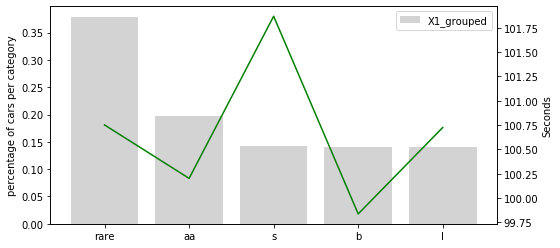

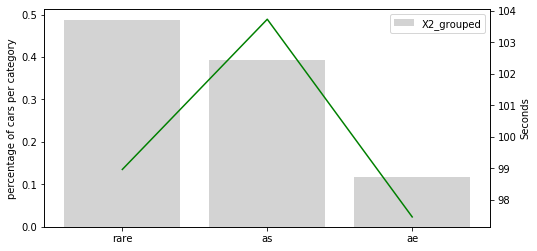

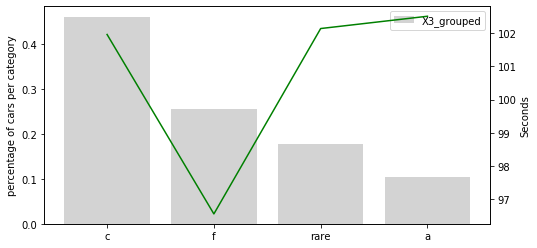

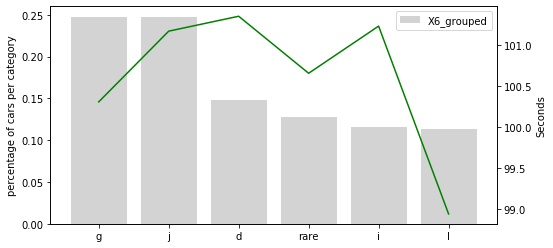

In [16]:
# let's go ahead and plot the bar plots indicating the % of cars per
# label and the time to pass the test, for each of the new variables

for col in ['X1_grouped', 'X2_grouped', 'X3_grouped', 'X6_grouped']:
    
    # calculate the frequency of the different labels in the variable
    temp_df = pd.Series(data[col].value_counts() / total_cars).reset_index()

    # rename the columns
    temp_df.columns = [col, col + '_perc_cars']

    # merge onto the mean time to pass the test
    temp_df = temp_df.merge(
        data.groupby([col])['y'].mean().reset_index(), on=col, how='left')

    # plot
    fig, ax = plt.subplots(figsize=(8, 4))
    plt.xticks(temp_df.index, temp_df[col], rotation=0)
    ax2 = ax.twinx()

    ax.bar(
        temp_df.index,
        temp_df[col + '_perc_cars'],
        color='lightgrey',
        label=col)

    ax2.plot(
        temp_df.index,
        temp_df["y"],
        color='green',
    )

    ax.set_ylabel('percentage of cars per category')
    ax2.set_ylabel('Seconds')
    ax.legend()
    plt.show()

Here we can see for example, that cars with the the label f for variable X3, tend to spend less time in testing, and all the infrequent labels together tend to behave overall like the features c and a as well, in terms of time to pass the test.

In the ideal scenario, we would also like to have the standard deviation / interquantile range for the time to pass the test, to get an idea of how variable the time to pass is for each category.

### Rare labels lead to uneven distribution of categories in train and test sets

Similarly to highly cardinal variables, rare or infrequent labels often land only on the training set, or only on the testing set. If present only in the training set, they may lead to overfitting. If present only on the testing set, the machine learning algorithm will not know how to handle them, as it has not seen it during training. Let's explore this further.

In [17]:
# let's separate into training and testing set
X_train, X_test, y_train, y_test = train_test_split(
    data[cols_to_use], data.y, test_size=0.3, random_state=0)

X_train.shape, X_test.shape

((2946, 4), (1263, 4))

In [18]:
# Let's find out labels present only in the training set
# I will use X2 as example

unique_to_train_set = [
    x for x in X_train['X2'].unique() if x not in X_test['X2'].unique()
]

print(unique_to_train_set)

['l', 'aa', 'au', 'o', 'af', 'c', 'am']


There are 7 categories present in the train set and are not present in the test set.

In [19]:
# Let's find out labels present only in the test set

unique_to_test_set = [
    x for x in X_test['X2'].unique() if x not in X_train['X2'].unique()
]

print(unique_to_test_set)

['ar', 'j']


In this case, there are 2 rare values present in the test set only.

### Effect of rare labels on machine learning algorithms

In [20]:
# In order to use this variables to build machine learning using sklearn
# first we need to replace the labels by numbers.

# The correct way to do this, is to first separate into training and test
# sets. And then create a replacing dictionary using the train set
# and replace the strings both in train and test using the dictionary
# created.

# This will lead to the introduction of missing values / NaN in the
# test set, for those labels that are not present in the train set
# we saw this effect in the previous lecture

# in the section dedicated to rare values later in the course, I will
# show you how to avoid this problem

# now, in order to speed up the demonstration, I will replace the
# labels by strings in the entire dataset, and then divide into
# train and test. 
# but remember: THIS IS NOT GOOD PRACTICE!

# original variables
for col in cols_to_use:
    # create the dic and replace the strings in one line
    data.loc[:, col] = data.loc[:, col].map(
        {k: i
         for i, k in enumerate(data[col].unique(), 0)})

# variables with grouped categories
for col in ['X1_grouped', 'X6_grouped', 'X3_grouped', 'X2_grouped']:
    # create the dic and replace the strings in one line
    data.loc[:, col] = data.loc[:, col].map(
        {k: i
         for i, k in enumerate(data[col].unique(), 0)})

data.head(10)

,y,X1,X2,X3,X6,X1_grouped,X2_grouped,X3_grouped,X6_grouped
0,130.81,0,0,0,0,0,0,0,0
1,88.53,1,1,1,1,0,0,1,1
2,76.26,2,2,2,0,0,0,2,0
3,80.62,1,2,3,1,0,0,3,1
4,78.02,0,2,3,2,0,0,3,2
5,92.93,3,3,2,3,1,0,2,3
6,128.76,4,3,3,3,0,0,3,3
7,91.91,5,4,3,0,2,1,3,0
8,108.67,6,4,1,4,3,1,1,4
9,126.99,3,5,2,5,1,0,2,3


In [21]:
# let's remind ourselves the original columns
cols_to_use

['X1', 'X2', 'X3', 'X6']

In [22]:
# let's add the grouped variables to a list
cols_grouped = ['X1_grouped', 'X6_grouped', 'X3_grouped', 'X2_grouped']
cols_grouped

['X1_grouped', 'X6_grouped', 'X3_grouped', 'X2_grouped']

In [23]:
# let's combine the list of variables
cols = cols_to_use+cols_grouped

In [24]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(
    data[cols],
    data.y,
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((2946, 8), (1263, 8))

Next I will build a series of machine learning algorithms, using comparatively the original categorical variables, and those where the infrequent labels were grouped, and then examine their performance.

### Random Forests

In [25]:
# model built on data with infrequent categories (original)

# call the model
rf = RandomForestRegressor(n_estimators=300,
                           max_depth=34,
                           random_state=39)

# train the model
rf.fit(X_train[cols_to_use], y_train)

# make and print predictions in train and test sets
print('Train set')
pred = rf.predict(X_train[cols_to_use])
print('Random Forests mse: {}'.format(mean_squared_error(y_train, pred)))
print('Random Forests r2: {}'.format(r2_score(y_train, pred)))
print('Test set')
pred = rf.predict(X_test[cols_to_use])
print('Random Forests mse: {}'.format(mean_squared_error(y_test, pred)))
print('Random Forests r2: {}'.format(r2_score(y_test, pred)))

Train set
Random Forests mse: 73.91420367780387
Random Forests r2: 0.524089147901724
Test set
Random Forests mse: 151.10099965156573
Random Forests r2: 0.1261592100558474


We can see from the mean squared error and the r2 that the Random Forests are over-fitting to the train set. The mse for the train set is less than half the value of the mse of the test set. The r2 in the test set is significantly lower than the one in the train set.

In [26]:
# model built on data with rare values grouped into one category: rare

# call the model
rf = RandomForestRegressor(n_estimators=300,
                           max_depth=4,
                           random_state=39)

# train the model
rf.fit(X_train[cols_grouped], y_train)

# make and print preditions
print('Train set')
pred = rf.predict(X_train[cols_grouped])
print('Random Forests mse: {}'.format(mean_squared_error(y_train, pred)))
print('Random Forests r2: {}'.format(r2_score(y_train, pred)))
print('Test set')
pred = rf.predict(X_test[cols_grouped])
print('Random Forests mse: {}'.format(mean_squared_error(y_test, pred)))
print('Random Forests r2: {}'.format(r2_score(y_test, pred)))

Train set
Random Forests mse: 136.10890251001152
Random Forests r2: 0.12363658744046446
Test set
Random Forests mse: 154.78054883151322
Random Forests r2: 0.10487979979742335


We can see an improvement in Random Forests: when we train the model using all the labels, the model has a strong over-fit to the training set. However, when we train the model using fewer categories, the Random Forests over-fit much less (mse 73 vs mse 136; r2 0.12 vs 0.52). In addition, the second model still keeps a similar generalisation power to unseen data.

Disclaimer: I am using a max_depth of 4, in order to make the forest overfit, so that I can show you the effect of rare labels on this algorithm. We can indeed improve the fit and generalisation by building less and more shallow trees.

### AdaBoost

In [27]:
# model build on data with all the categories

ada = AdaBoostRegressor(n_estimators=400, random_state=44)
ada.fit(X_train[cols_to_use], y_train)
print('Train set')
pred = ada.predict(X_train[cols_to_use])
print('AdaBoost mse: {}'.format(mean_squared_error(y_train, pred)))
print('AdaBoost r2: {}'.format(r2_score(y_train, pred)))
print('Test set')
pred = ada.predict(X_test[cols_to_use])
print('AdaBoost mse: {}'.format(mean_squared_error(y_test, pred)))
print('AdaBoost r2: {}'.format(r2_score(y_test, pred)))

Train set
AdaBoost mse: 152.55660134599108
AdaBoost r2: 0.017734907132739508
Test set
AdaBoost mse: 172.10171312106795
AdaBoost r2: 0.004708788881281345


In [28]:
# model build on data with fewer categories in Cabin Variable

ada = AdaBoostRegressor(n_estimators=400, random_state=44)
ada.fit(X_train[cols_grouped], y_train)
print('Train set')
pred = ada.predict(X_train[cols_grouped])
print('AdaBoost mse: {}'.format(mean_squared_error(y_train, pred)))
print('AdaBoost r2: {}'.format(r2_score(y_train, pred)))
print('Test set')
pred = ada.predict(X_test[cols_grouped])
print('AdaBoost mse: {}'.format(mean_squared_error(y_test, pred)))
print('AdaBoost r2: {}'.format(r2_score(y_test, pred)))

Train set
AdaBoost mse: 149.4235105602519
AdaBoost r2: 0.03790791626156742
Test set
AdaBoost mse: 166.59119412837987
AdaBoost r2: 0.036576984860637984


We see an improvement in Adaboost when trained using the variables with less categories. The mse is smaller in the latter and the r2 is higher, both for the training and testing sets.

### Linear Regression

In [29]:
# model build on data with plenty of categories

linreg = LinearRegression()
linreg.fit(X_train[cols_to_use], y_train)
print('Train set')
pred = linreg.predict(X_train[cols_to_use])
print('Linear Regression mse: {}'.format(mean_squared_error(y_train, pred)))
print('Linear Regression r2: {}'.format(r2_score(y_train, pred)))
print('Test set')
pred = linreg.predict(X_test[cols_to_use])
print('Linear Regression mse: {}'.format(mean_squared_error(y_test, pred)))
print('Linear Regression r2e: {}'.format(r2_score(y_test, pred)))

Train set
Linear Regression mse: 154.61105621770932
Linear Regression r2: 0.004506903312812227
Test set
Linear Regression mse: 172.95013673475464
Linear Regression r2e: -0.00019777800114084698


In [30]:
# model build on data with infrequent categories grouped under one label

linreg = LinearRegression()
linreg.fit(X_train[cols_grouped], y_train)
print('Train set')
pred = linreg.predict(X_train[cols_grouped])
print('Linear Regression mse: {}'.format(mean_squared_error(y_train, pred)))
print('Linear Regression r2: {}'.format(r2_score(y_train, pred)))
print('Test set')
pred = linreg.predict(X_test[cols_grouped])
print('Linear Regression mse: {}'.format(mean_squared_error(y_test, pred)))
print('Linear Regression r2e: {}'.format(r2_score(y_test, pred)))

Train set
Linear Regression mse: 151.45755379522734
Linear Regression r2: 0.02481133670046498
Test set
Linear Regression mse: 169.30336571670514
Linear Regression r2e: 0.020892071003870694


Here again, the Linear Regression also benefited from removing rare labels: the mse has decreased in both train and test sets, and the r2 has increased. So now you know how having less categories and grouping the infrequent ones into one single group can increase the performance of the machine learning models.

**That is all for this demonstration. I hope you enjoyed the notebook, and see you in the next one.**